In this second part, we are working on the house prices data set assembled and published by Dean De Cock. It's a set of 2,930 observations with 82 attributes each. The goal is to use the first 2,430 ones to fit and evaluate different models and use them to make predictions for the last 500 ones. 

According to the documentation: 
The data set contains information from the Ames Assessorís Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010.

VARIABLE DESCRIPTIONS: Tab characters are used to separate variables in the data file. The data has 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers).

SOURCES: Ames, Iowa Assessorís Office

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style


import seaborn as sns
import warnings

import scipy.stats as stats
from scipy.stats import skew

from math import sqrt

from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, LinearRegression, RidgeCV
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE


%matplotlib inline
warnings.filterwarnings('ignore')


### A quick look at the data

In [2]:
pd.set_option('display.max_columns', 100)

train = pd.read_csv('house-prices.csv')
train.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,300.0,Unf,0.0,652.0,952.0,GasA,Ex,Y,SBrkr,980,1276,0,2256,0.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,BuiltIn,2000.0,Fin,2.0,554.0,TA,TA,Y,224,54,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1951,1951,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,522.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,216.0,216.0,GasA,TA,Y,SBrkr,1575,0,0,1575,0.0,0.0,1,1,2,1,Gd,5,Typ,1,Gd,Attchd,1951.0,Unf,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,BrkFace,80.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Fa,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1970.0,Unf,1.0,286.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,1018.0,Unf,0.0,380.0,1398.0,GasA,Gd,Y,SBrkr,1700,0,0,1700,0.0,1.0,1,1,4,1,Gd,6,Typ,1,Gd,Attchd,1959.0,RFn,2.0,447.0,TA,TA,Y,0,38,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,Norm,2fmCon,2.5Unf,7,4,1910,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,925.0,925.0,GasA,TA,N,FuseF,964,925,0,1889,0.0,0.0,1,1,4,2,TA,9,Typ,1,Gd,Detchd,1960.0,Unf,1.0,308.0,TA,TA,N,0,0,264,0,0,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000


In [3]:
# Remove white spaces from the column names since this might cause some problems in the future.
train.columns = train.columns.str.replace(' ', '')
train.tail()

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2425,764,904301070,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,5,5,1987,1988,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,Gd,Gd,Gd,GLQ,1200.0,Unf,0.0,0.0,1200.0,GasA,TA,Y,SBrkr,1200,0,0,1200,3.0,0.0,3,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,120,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000
2426,836,907126010,20,RL,82.0,12464,Pave,NaN,IR2,Low,AllPub,Corner,Mod,CollgCr,Norm,Norm,1Fam,1Story,5,5,1996,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,PConc,Gd,TA,No,GLQ,732.0,Unf,0.0,308.0,1040.0,GasA,Gd,Y,SBrkr,1040,0,0,1040,1.0,0.0,1,0,3,1,Gd,6,Typ,0,NaN,Detchd,2000.0,Unf,2.0,576.0,TA,TA,Y,168,0,0,0,0,0,NaN,GdPrv,NaN,0,11,2009,WD,Normal,152000
2427,1654,527353080,60,RL,80.0,11584,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,SLvl,7,6,1979,1979,Hip,CompShg,HdBoard,HdBoard,BrkFace,96.0,TA,TA,CBlock,TA,TA,No,GLQ,315.0,Rec,110.0,114.0,539.0,GasA,TA,Y,SBrkr,1040,685,0,1725,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1979.0,RFn,2.0,550.0,TA,TA,Y,0,88,216,0,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal,197000
2428,2608,535402070,80,RL,85.0,13400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,5,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,BrkFace,1047.0,TA,TA,CBlock,TA,TA,Av,ALQ,516.0,BLQ,128.0,380.0,1024.0,GasA,TA,Y,SBrkr,1086,0,0,1086,1.0,0.0,1,0,3,1,TA,6,Typ,1,Gd,Attchd,1966.0,RFn,2.0,484.0,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,6,2006,WD,Normal,159950
2429,2733,905402110,20,RL,75.0,9375,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1954,1954,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Rec,799.0,Unf,0.0,168.0,967.0,GasA,Ex,Y,SBrkr,1350,0,0,1350,0.0,0.0,1,1,3,1,TA,6,Typ,1,Gd,Attchd,1954.0,RFn,2.0,504.0,TA,TA,Y,237,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,146000


In [4]:
pred = pd.read_csv('house-prices-test.csv')
pred.columns = pred.columns.str.replace(' ', '')
pred.head()

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,2217,909279080,50,RL,NaN,11275,Pave,NaN,IR1,HLS,AllPub,Corner,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,6,7,1932,1950,Gable,CompShg,MetalSd,MetalSd,BrkFace,480.0,TA,TA,CBlock,TA,TA,Mn,Rec,297.0,LwQ,557.0,0.0,854.0,GasA,TA,Y,SBrkr,1096,895,0,1991,0.0,0.0,1,1,3,1,TA,7,Typ,1,Gd,Detchd,1977.0,Unf,2.0,432.0,TA,Fa,Y,0,0,19,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
1,837,907126050,20,RL,65.0,9757,Pave,NaN,Reg,Low,AllPub,Inside,Mod,CollgCr,Norm,Norm,1Fam,1Story,5,7,1994,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,PConc,TA,TA,No,ALQ,755.0,Unf,0.0,235.0,990.0,GasA,Ex,Y,SBrkr,990,0,0,990,1.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1995.0,RFn,1.0,440.0,TA,TA,Y,66,0,0,0,92,0,NaN,NaN,NaN,0,10,2009,WD,Normal
2,2397,528144030,60,RL,86.0,11065,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,788.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0.0,Unf,0.0,1085.0,1085.0,GasA,Ex,Y,SBrkr,1120,850,0,1970,0.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,BuiltIn,2006.0,Fin,3.0,753.0,TA,TA,Y,177,74,0,0,0,0,NaN,NaN,NaN,0,10,2006,New,Partial
3,1963,535452060,20,RL,70.0,7000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1960,2002,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,45.0,TA,TA,CBlock,TA,TA,No,Rec,588.0,Unf,0.0,422.0,1010.0,GasA,Ex,Y,SBrkr,1134,0,0,1134,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Attchd,1960.0,RFn,1.0,254.0,TA,TA,Y,0,16,0,0,0,0,NaN,MnWw,NaN,0,4,2007,WD,Family
4,306,911202100,50,C (all),66.0,8712,Pave,Pave,Reg,HLS,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,7,1900,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Stone,TA,TA,Mn,Unf,0.0,Unf,0.0,859.0,859.0,GasA,Gd,Y,SBrkr,859,319,0,1178,0.0,0.0,1,0,2,1,TA,7,Typ,0,NaN,Detchd,1964.0,RFn,1.0,384.0,TA,TA,N,68,0,98,0,0,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml


In [5]:
pred.tail()

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
495,235,905378040,50,RL,124.0,18600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,3,4,1938,1990,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,Mn,BLQ,288.0,LwQ,684.0,0.0,972.0,GasA,TA,Y,FuseA,1052,558,0,1610,0.0,1.0,2,0,4,1,Fa,8,Typ,1,Gd,Attchd,1938.0,RFn,1.0,480.0,TA,TA,Y,0,0,60,0,0,0,NaN,NaN,Shed,450,6,2010,WD,Normal
496,2518,533252020,20,RL,NaN,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,6,6,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,Gd,TA,CBlock,Gd,TA,No,ALQ,767.0,Unf,0.0,441.0,1208.0,GasA,TA,Y,SBrkr,1208,0,0,1208,1.0,0.0,1,1,3,1,TA,6,Typ,1,TA,Attchd,1977.0,RFn,2.0,546.0,TA,TA,Y,198,42,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
497,350,527127100,120,RL,28.0,7296,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2004,2005,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1965.0,Unf,0.0,243.0,2208.0,GasA,Ex,Y,SBrkr,2522,0,0,2522,1.0,0.0,2,0,1,1,Gd,8,Typ,1,Gd,Attchd,2004.0,Fin,2.0,564.0,TA,TA,Y,182,57,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
498,821,906340120,20,RL,61.0,10226,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2008,2008,Gable,CompShg,VinylSd,VinylSd,Stone,270.0,Gd,TA,PConc,Ex,TA,Gd,Unf,0.0,Unf,0.0,1622.0,1622.0,GasA,Ex,Y,SBrkr,1630,0,0,1630,1.0,0.0,2,0,3,1,Ex,8,Typ,1,Gd,Attchd,2008.0,RFn,3.0,860.0,TA,TA,Y,172,42,0,0,0,0,NaN,NaN,NaN,0,1,2009,WD,Normal
499,2005,902427180,80,RM,76.0,11800,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,SLvl,4,7,1949,2002,Gable,CompShg,Stucco,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,1382,0,0,1382,0.0,0.0,2,0,1,1,TA,6,Mod,1,TA,Attchd,1957.0,RFn,1.0,384.0,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [6]:
train.shape , pred.shape

((2430, 82), (500, 81))

In [7]:
train.drop(columns=['Order'], inplace=True)
pred.drop(columns=['Order'], inplace=True)

In [8]:
train.describe()

,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2.430000e+03,2430.000000,2010.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2410.000000,2429.000000,2429.000000,2429.000000,2429.000000,2430.000000,2430.000000,2430.000000,2430.000000,2428.000000,2428.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2292.000000,2429.000000,2429.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000
mean,7.149375e+08,57.092593,69.201990,10243.557613,6.088889,5.569959,1971.167490,1984.238683,101.995436,443.944422,51.073693,556.480856,1051.498971,1159.845267,326.672840,4.586831,1491.104938,0.434102,0.060132,1.560905,0.369547,2.842798,1.042798,6.409053,0.595062,1977.861257,1.762454,471.979415,93.917695,47.091770,22.294650,2.471605,16.529218,2.401235,56.179835,6.209465,2007.783539,180199.692593
std,1.887339e+08,42.903254,23.486988,8353.925254,1.414621,1.116442,30.207931,20.751163,176.611699,457.453649,172.143522,439.650118,444.690012,393.097610,419.490754,47.216176,496.178280,0.527941,0.242923,0.548393,0.501191,0.817659,0.208455,1.551557,0.646599,25.544869,0.758243,215.753523,128.106940,67.123846,62.386414,24.880245,56.822227,36.111988,616.661541,2.721942,1.311843,79607.467171
min,5.263011e+08,20.000000,21.000000,1470.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1896.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284770e+08,20.000000,58.000000,7482.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,794.000000,880.500000,0.000000,0.000000,1120.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,324.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129000.000000
50%,5.354541e+08,50.000000,68.000000,9500.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,375.000000,0.000000,462.000000,990.000000,1086.000000,0.000000,0.000000,1440.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,478.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,9.071352e+08,70.000000,80.000000,11604.500000,7.000000,6.000000,2000.000000,2003.000000,164.750000,737.000000,0.000000,799.000000,1299.000000,1387.750000,698.000000,0.000000,1740.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213099.750000
max,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,4.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [9]:
## Gives us information about the features. 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 81 columns):
PID              2430 non-null int64
MSSubClass       2430 non-null int64
MSZoning         2430 non-null object
LotFrontage      2010 non-null float64
LotArea          2430 non-null int64
Street           2430 non-null object
Alley            163 non-null object
LotShape         2430 non-null object
LandContour      2430 non-null object
Utilities        2430 non-null object
LotConfig        2430 non-null object
LandSlope        2430 non-null object
Neighborhood     2430 non-null object
Condition1       2430 non-null object
Condition2       2430 non-null object
BldgType         2430 non-null object
HouseStyle       2430 non-null object
OverallQual      2430 non-null int64
OverallCond      2430 non-null int64
YearBuilt        2430 non-null int64
YearRemod/Add    2430 non-null int64
RoofStyle        2430 non-null object
RoofMatl         2430 non-null object
Exterior1st      2430 non-

In [10]:
## Gives us the count of different types of objects.
train.get_dtype_counts()

int64      27
object     43
float64    11
dtype: int64

In [11]:
pred.describe()

,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,5.000000e+02,500.000000,430.000000,500.000000,500.000000,500.000000,500.000000,500.000000,497.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,479.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.00000,500.00000
mean,7.121658e+08,58.820000,69.330233,9683.132000,6.124000,5.530000,1972.274000,1984.402000,101.418511,436.242000,43.158000,572.776000,1052.176000,1158.16000,378.142000,5.114000,1541.416000,0.418000,0.066000,1.594000,0.428000,2.910000,1.052000,6.608000,0.620000,1979.430063,1.788000,476.902000,92.946000,49.680000,26.496000,3.18000,13.440000,1.476000,23.688000,6.24800,2007.82400
std,1.888879e+08,41.336728,22.814602,4950.630454,1.394458,1.087873,30.440305,21.403378,190.962191,446.826476,153.891202,438.924115,420.686171,386.35844,467.378415,41.670299,547.214249,0.509701,0.256467,0.574303,0.507278,0.873743,0.239606,1.664896,0.654566,25.436088,0.772171,211.744251,117.628585,69.232651,72.019689,26.39145,52.347674,33.004363,175.375094,2.68046,1.34038
min,5.263510e+08,20.000000,21.000000,1300.000000,2.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,494.00000,0.000000,0.000000,540.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.00000,2006.00000
25%,5.284576e+08,20.000000,59.000000,7329.000000,5.000000,5.000000,1953.000000,1964.000000,0.000000,0.000000,0.000000,242.750000,784.000000,864.00000,0.000000,0.000000,1173.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,6.000000,0.000000,1960.000000,1.000000,312.750000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.00000,2007.00000
50%,5.354532e+08,60.000000,69.000000,9150.500000,6.000000,5.000000,1975.000000,1994.000000,0.000000,342.500000,0.000000,478.000000,990.000000,1077.50000,0.000000,0.000000,1454.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1987.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.00000,0.000000,0.000000,0.000000,6.00000,2008.00000
75%,9.072555e+08,75.000000,80.000000,11312.750000,7.000000,6.000000,2001.250000,2004.000000,148.000000,706.250000,0.000000,811.500000,1303.000000,1382.25000,731.250000,0.000000,1769.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.250000,171.250000,72.000000,0.000000,0.00000,0.000000,0.000000,0.000000,8.00000,2009.00000
max,9.232771e+08,190.000000,153.000000,53504.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2260.000000,1474.000000,1969.000000,3200.000000,3228.00000,1796.000000,514.000000,4676.000000,2.000000,2.000000,4.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,5.000000,1220.000000,728.000000,444.000000,584.000000,360.00000,576.000000,738.000000,2500.000000,12.00000,2010.00000


In [12]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 80 columns):
PID              500 non-null int64
MSSubClass       500 non-null int64
MSZoning         500 non-null object
LotFrontage      430 non-null float64
LotArea          500 non-null int64
Street           500 non-null object
Alley            35 non-null object
LotShape         500 non-null object
LandContour      500 non-null object
Utilities        500 non-null object
LotConfig        500 non-null object
LandSlope        500 non-null object
Neighborhood     500 non-null object
Condition1       500 non-null object
Condition2       500 non-null object
BldgType         500 non-null object
HouseStyle       500 non-null object
OverallQual      500 non-null int64
OverallCond      500 non-null int64
YearBuilt        500 non-null int64
YearRemod/Add    500 non-null int64
RoofStyle        500 non-null object
RoofMatl         500 non-null object
Exterior1st      500 non-null object
Exterior2nd   

In [13]:
pred.get_dtype_counts()

int64      26
object     43
float64    11
dtype: int64

**Observation**

There are multiple types of features.
- Some features have missing values.
- Most of the features are object (includes string values in the variable).

### Data cleaning

In the data cleaning phase we adress the following steps:

- Find and handle incorrect, missing values
- Correct inconsistencies in the variables
- Handle outliers


In [14]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
print("Numerical features in train : " + str(len(numerical_features)))
print("Categorical features in train : " + str(len(categorical_features)))
train_num = train[numerical_features]
train_cat = train[categorical_features]

Numerical features in train : 37
Categorical features in train : 43


In [15]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = pred.select_dtypes(include = ["object"]).columns
numerical_features = pred.select_dtypes(exclude = ["object"]).columns
print("Numerical features in pred : " + str(len(numerical_features)))
print("Categorical features in pred : " + str(len(categorical_features)))
pred_num = pred[numerical_features]
pred_cat = pred[categorical_features]

Numerical features in pred : 37
Categorical features in pred : 43


In [16]:
# Missing values in numeric columns of our traing dataset
train[train_num.columns].isnull().sum()

PID                0
MSSubClass         0
LotFrontage      420
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemod/Add      0
MasVnrArea        20
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      138
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [17]:
# Handle missing values for features where median/mean or most common value doesn't make sense

# LotFrontage : NA most likely means no lot frontage
train.loc[:, "LotFrontage"] = train.loc[:, "LotFrontage"].fillna(0)
# MasVnrType : NA most likely means no veneer
train.loc[:, "MasVnrArea"] = train.loc[:, "MasVnrArea"].fillna(0)
# We dont know what the meaning of NaNs in this column is and we are therefore going to fill it with the meadian value
train.loc[:, "GarageYrBlt"] = train.loc[:, "GarageYrBlt"].fillna(train['GarageYrBlt'].median())

In [18]:
train[train_cat.columns].isnull().sum()

MSZoning            0
Street              0
Alley            2267
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType         20
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           71
BsmtCond           71
BsmtExposure       74
BsmtFinType1       71
BsmtFinType2       72
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu      1186
GarageType        136
GarageFinish      138
GarageQual        138
GarageCond        138
PavedDrive          0
PoolQC           2418
Fence            1941
MiscFeature      2340
SaleType            0
SaleCondition       0
dtype: int64

In [19]:
# Handle missing values for features where median/mean or most common value doesn't make sense

# Alley : data description says NA means "no alley access"
train.loc[:, "Alley"] = train.loc[:, "Alley"].fillna("None")
# BsmtQual etc : data description says NA for basement features is "no basement"
train.loc[:, "BsmtQual"] = train.loc[:, "BsmtQual"].fillna("No")
train.loc[:, "BsmtCond"] = train.loc[:, "BsmtCond"].fillna("No")
train.loc[:, "BsmtExposure"] = train.loc[:, "BsmtExposure"].fillna("No")
train.loc[:, "BsmtFinType1"] = train.loc[:, "BsmtFinType1"].fillna("No")
train.loc[:, "BsmtFinType2"] = train.loc[:, "BsmtFinType2"].fillna("No")
# Fence : data description says NA means "no fence"
train.loc[:, "Fence"] = train.loc[:, "Fence"].fillna("No")
# FireplaceQu : data description says NA means "no fireplace"
train.loc[:, "FireplaceQu"] = train.loc[:, "FireplaceQu"].fillna("No")
# GarageType etc : data description says NA for garage features is "no garage"
train.loc[:, "GarageType"] = train.loc[:, "GarageType"].fillna("No")
train.loc[:, "GarageFinish"] = train.loc[:, "GarageFinish"].fillna("No")
train.loc[:, "GarageQual"] = train.loc[:, "GarageQual"].fillna("No")
train.loc[:, "GarageCond"] = train.loc[:, "GarageCond"].fillna("No")
# MasVnrType : NA most likely means no veneer
train.loc[:, "MasVnrType"] = train.loc[:, "MasVnrType"].fillna("None")
# MiscFeature : data description says NA means "no misc feature"
train.loc[:, "MiscFeature"] = train.loc[:, "MiscFeature"].fillna("No")
# PoolQC : data description says NA means "no pool"
train.loc[:, "PoolQC"] = train.loc[:, "PoolQC"].fillna("No")

In [20]:
train.isnull().sum().sort_values().tail(10)

MasVnrArea      0
BsmtFinSF1      1
TotalBsmtSF     1
BsmtFinSF2      1
BsmtUnfSF       1
GarageArea      1
GarageCars      1
Electrical      1
BsmtHalfBath    2
BsmtFullBath    2
dtype: int64

In [21]:
# We are going to drop the remaining few missing values from our dataset
train.dropna(inplace=True)

In [22]:
train.isnull().sum().sort_values().tail(10)

ExterCond      0
ExterQual      0
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
RoofMatl       0
RoofStyle      0
Heating        0
SalePrice      0
dtype: int64

**Repeat the procedures for the test set**

In [23]:
# Missing values in numeric columns of our traing dataset
pred[pred_num.columns].isnull().sum()

PID               0
MSSubClass        0
LotFrontage      70
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemod/Add     0
MasVnrArea        3
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      21
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
dtype: int64

In [24]:
# Handle missing values for features where median/mean or most common value doesn't make sense

# LotFrontage : NA most likely means no lot frontage
pred.loc[:, "LotFrontage"] = pred.loc[:, "LotFrontage"].fillna(0)
# MasVnrType : NA most likely means no veneer
train.loc[:, "MasVnrArea"] = pred.loc[:, "MasVnrArea"].fillna(0)
# We dont know what the meaning of NaNs in this column is and we are therefore going to fill it with the meadian value
pred.loc[:, "GarageYrBlt"] = pred.loc[:, "GarageYrBlt"].fillna(pred['GarageYrBlt'].median())

In [25]:
pred[pred_cat.columns].isnull().sum()

MSZoning           0
Street             0
Alley            465
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         3
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           9
BsmtCond           9
BsmtExposure       9
BsmtFinType1       9
BsmtFinType2       9
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
KitchenQual        0
Functional         0
FireplaceQu      236
GarageType        21
GarageFinish      21
GarageQual        21
GarageCond        21
PavedDrive         0
PoolQC           499
Fence            417
MiscFeature      484
SaleType           0
SaleCondition      0
dtype: int64

In [26]:
# Handle missing values for features where median/mean or most common value doesn't make sense

# Alley : data description says NA means "no alley access"
pred.loc[:, "Alley"] = pred.loc[:, "Alley"].fillna("None")
# BsmtQual etc : data description says NA for basement features is "no basement"
pred.loc[:, "BsmtQual"] = pred.loc[:, "BsmtQual"].fillna("No")
pred.loc[:, "BsmtCond"] = pred.loc[:, "BsmtCond"].fillna("No")
pred.loc[:, "BsmtExposure"] = pred.loc[:, "BsmtExposure"].fillna("No")
pred.loc[:, "BsmtFinType1"] = pred.loc[:, "BsmtFinType1"].fillna("No")
pred.loc[:, "BsmtFinType2"] = pred.loc[:, "BsmtFinType2"].fillna("No")
# Fence : data description says NA means "no fence"
pred.loc[:, "Fence"] = pred.loc[:, "Fence"].fillna("No")
# FireplaceQu : data description says NA means "no fireplace"
pred.loc[:, "FireplaceQu"] = pred.loc[:, "FireplaceQu"].fillna("No")
# GarageType etc : data description says NA for garage features is "no garage"
pred.loc[:, "GarageType"] = pred.loc[:, "GarageType"].fillna("No")
pred.loc[:, "GarageFinish"] = pred.loc[:, "GarageFinish"].fillna("No")
pred.loc[:, "GarageQual"] = pred.loc[:, "GarageQual"].fillna("No")
pred.loc[:, "GarageCond"] = pred.loc[:, "GarageCond"].fillna("No")
# MasVnrType : NA most likely means no veneer
pred.loc[:, "MasVnrType"] = pred.loc[:, "MasVnrType"].fillna("None")
# MiscFeature : data description says NA means "no misc feature"
pred.loc[:, "MiscFeature"] = pred.loc[:, "MiscFeature"].fillna("No")
# PoolQC : data description says NA means "no pool"
pred.loc[:, "PoolQC"] = pred.loc[:, "PoolQC"].fillna("No")

In [27]:
# We are going to drop the remaining few missing values from our dataset
pred.dropna(inplace=True)

In [28]:
pred.isnull().sum().sort_values().tail(10)

ExterCond        0
ExterQual        0
MasVnrArea       0
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
SaleType         0
SaleCondition    0
dtype: int64

### Feature encoding

In [29]:
# Some numerical features are actually really categories
train = train.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [30]:
# Encode some categorical features as ordered numbers when there is information in the order
train = train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

Creating new features by:
- Simplifications of existing features
- Combinations of existing features

I initially tried a big number of new features, but ended up discarding many of them, because they did not improve the quality of the model.

In [31]:
# Create new features
# 1* Simplifications of existing features
train["SimplOverallQual"] = train.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
train["SimplOverallCond"] = train.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
train["SimplPoolQC"] = train.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })
train["SimplGarageCond"] = train.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
train["SimplGarageQual"] = train.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
# train["SimplFireplaceQu"] = train.FireplaceQu.replace({1 : 1, # bad
#                                                        2 : 1, 3 : 1, # average
#                                                        4 : 2, 5 : 2 # good
#                                                       })
# train["SimplFireplaceQu"] = train.FireplaceQu.replace({1 : 1, # bad
#                                                        2 : 1, 3 : 1, # average
#                                                        4 : 2, 5 : 2 # good
#                                                       })
# train["SimplFunctional"] = train.Functional.replace({1 : 1, 2 : 1, # bad
#                                                      3 : 2, 4 : 2, # major
#                                                      5 : 3, 6 : 3, 7 : 3, # minor
#                                                      8 : 4 # typical
#                                                     })
# train["SimplKitchenQual"] = train.KitchenQual.replace({1 : 1, # bad
#                                                        2 : 1, 3 : 1, # average
#                                                        4 : 2, 5 : 2 # good
#                                                       })
# train["SimplHeatingQC"] = train.HeatingQC.replace({1 : 1, # bad
#                                                    2 : 1, 3 : 1, # average
#                                                    4 : 2, 5 : 2 # good
#                                                   })
# train["SimplBsmtFinType1"] = train.BsmtFinType1.replace({1 : 1, # unfinished
#                                                          2 : 1, 3 : 1, # rec room
#                                                          4 : 2, 5 : 2, 6 : 2 # living quarters
#                                                         })
# train["SimplBsmtFinType2"] = train.BsmtFinType2.replace({1 : 1, # unfinished
#                                                          2 : 1, 3 : 1, # rec room
#                                                          4 : 2, 5 : 2, 6 : 2 # living quarters
#                                                         })
# train["SimplBsmtCond"] = train.BsmtCond.replace({1 : 1, # bad
#                                                  2 : 1, 3 : 1, # average
#                                                  4 : 2, 5 : 2 # good
#                                                 })
# train["SimplBsmtQual"] = train.BsmtQual.replace({1 : 1, # bad
#                                                  2 : 1, 3 : 1, # average
#                                                  4 : 2, 5 : 2 # good
#                                                 })
# train["SimplExterCond"] = train.ExterCond.replace({1 : 1, # bad
#                                                    2 : 1, 3 : 1, # average
#                                                    4 : 2, 5 : 2 # good
#                                                   })
# train["SimplExterQual"] = train.ExterQual.replace({1 : 1, # bad
#                                                    2 : 1, 3 : 1, # average
#                                                    4 : 2, 5 : 2 # good
#                                                   })

# 2* Combinations of existing features
# Overall quality of the house
train["OverallGrade"] = train["OverallQual"] * train["OverallCond"]
# Overall quality of the garage
train["GarageGrade"] = train["GarageQual"] * train["GarageCond"]
# Overall quality of the exterior
# train["ExterGrade"] = train["ExterQual"] * train["ExterCond"]
# Overall kitchen score
# train["KitchenScore"] = train["KitchenAbvGr"] * train["KitchenQual"]
# Overall fireplace score
# train["FireplaceScore"] = train["Fireplaces"] * train["FireplaceQu"]
# Overall garage score
# train["GarageScore"] = train["GarageArea"] * train["GarageQual"]
# Overall pool score
# train["PoolScore"] = train["PoolArea"] * train["PoolQC"]
# Simplified overall quality of the house
# train["SimplOverallGrade"] = train["SimplOverallQual"] * train["SimplOverallCond"]
# Simplified overall quality of the exterior
# train["SimplExterGrade"] = train["SimplExterQual"] * train["SimplExterCond"]
# Simplified overall pool score
# train["SimplPoolScore"] = train["PoolArea"] * train["SimplPoolQC"]
# Simplified overall garage score
# train["SimplGarageScore"] = train["GarageArea"] * train["SimplGarageQual"]
# Simplified overall fireplace score
# train["SimplFireplaceScore"] = train["Fireplaces"] * train["SimplFireplaceQu"]
# # Simplified overall kitchen score
# train["SimplKitchenScore"] = train["KitchenAbvGr"] * train["SimplKitchenQual"]
# # Total number of bathrooms
# train["TotalBath"] = train["BsmtFullBath"] + (0.5 * train["BsmtHalfBath"]) + \
# train["FullBath"] + (0.5 * train["HalfBath"])
# # Total SF for house (incl. basement)
# train["AllSF"] = train["GrLivArea"] + train["TotalBsmtSF"]
# # Total SF for 1st + 2nd floors
# train["AllFlrsSF"] = train["1stFlrSF"] + train["2ndFlrSF"]
# # Total SF for porch
# train["AllPorchSF"] = train["OpenPorchSF"] + train["EnclosedPorch"] + \
# train["3SsnPorch"] + train["ScreenPorch"]
# # Has masonry veneer or not
# train["HasMasVnr"] = train.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
#                                                "Stone" : 1, "None" : 0})
# # House completed before sale or not
# train["BoughtOffPlan"] = train.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
#                                                       "Family" : 0, "Normal" : 0, "Partial" : 1})

**Repeat the procedures for the pred set**

In [32]:
# Some numerical features are actually really categories
pred = pred.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [33]:
# Encode some categorical features as ordered numbers when there is information in the order
pred = pred.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

In [34]:
# Create new features
# 1* Simplifications of existing features
pred["SimplOverallQual"] = pred.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
pred["SimplOverallCond"] = pred.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
pred["SimplPoolQC"] = pred.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })
pred["SimplGarageCond"] = pred.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
pred["SimplGarageQual"] = pred.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
# test["SimplFireplaceQu"] = test.FireplaceQu.replace({1 : 1, # bad
#                                                        2 : 1, 3 : 1, # average
#                                                        4 : 2, 5 : 2 # good
#                                                       })
# test["SimplFireplaceQu"] = test.FireplaceQu.replace({1 : 1, # bad
#                                                        2 : 1, 3 : 1, # average
#                                                        4 : 2, 5 : 2 # good
#                                                       })
# test["SimplFunctional"] = test.Functional.replace({1 : 1, 2 : 1, # bad
#                                                      3 : 2, 4 : 2, # major
#                                                      5 : 3, 6 : 3, 7 : 3, # minor
#                                                      8 : 4 # typical
#                                                     })
# test["SimplKitchenQual"] = test.KitchenQual.replace({1 : 1, # bad
#                                                        2 : 1, 3 : 1, # average
#                                                        4 : 2, 5 : 2 # good
#                                                       })
# test["SimplHeatingQC"] = test.HeatingQC.replace({1 : 1, # bad
#                                                    2 : 1, 3 : 1, # average
#                                                    4 : 2, 5 : 2 # good
#                                                   })
# test["SimplBsmtFinType1"] = test.BsmtFinType1.replace({1 : 1, # unfinished
#                                                          2 : 1, 3 : 1, # rec room
#                                                          4 : 2, 5 : 2, 6 : 2 # living quarters
#                                                         })
# test["SimplBsmtFinType2"] = test.BsmtFinType2.replace({1 : 1, # unfinished
#                                                          2 : 1, 3 : 1, # rec room
#                                                          4 : 2, 5 : 2, 6 : 2 # living quarters
#                                                         })
# test["SimplBsmtCond"] = test.BsmtCond.replace({1 : 1, # bad
#                                                  2 : 1, 3 : 1, # average
#                                                  4 : 2, 5 : 2 # good
#                                                 })
# test["SimplBsmtQual"] = test.BsmtQual.replace({1 : 1, # bad
#                                                  2 : 1, 3 : 1, # average
#                                                  4 : 2, 5 : 2 # good
#                                                 })
# test["SimplExterCond"] = test.ExterCond.replace({1 : 1, # bad
#                                                    2 : 1, 3 : 1, # average
#                                                    4 : 2, 5 : 2 # good
#                                                   })
# test["SimplExterQual"] = test.ExterQual.replace({1 : 1, # bad
#                                                    2 : 1, 3 : 1, # average
#                                                    4 : 2, 5 : 2 # good
#                                                   })

# 2* Combinations of existing features
# Overall quality of the house
pred["OverallGrade"] = pred["OverallQual"] * pred["OverallCond"]
# Overall quality of the garage
pred["GarageGrade"] = pred["GarageQual"] * pred["GarageCond"]
# Overall quality of the exterior
# test["ExterGrade"] = test["ExterQual"] * test["ExterCond"]
# Overall kitchen score
# test["KitchenScore"] = test["KitchenAbvGr"] * test["KitchenQual"]
# Overall fireplace score
# test["FireplaceScore"] = test["Fireplaces"] * test["FireplaceQu"]
# Overall garage score
# test["GarageScore"] = test["GarageArea"] * test["GarageQual"]
# Overall pool score
# test["PoolScore"] = test["PoolArea"] * test["PoolQC"]
# Simplified overall quality of the house
# test["SimplOverallGrade"] = test["SimplOverallQual"] * test["SimplOverallCond"]
# Simplified overall quality of the exterior
# test["SimplExterGrade"] = test["SimplExterQual"] * test["SimplExterCond"]
# Simplified overall pool score
# test["SimplPoolScore"] = test["PoolArea"] * test["SimplPoolQC"]
# Simplified overall garage score
# test["SimplGarageScore"] = test["GarageArea"] * test["SimplGarageQual"]
# Simplified overall fireplace score
# test["SimplFireplaceScore"] = test["Fireplaces"] * test["SimplFireplaceQu"]
# # Simplified overall kitchen score
# test["SimplKitchenScore"] = test["KitchenAbvGr"] * test["SimplKitchenQual"]
# # Total number of bathrooms
# test["TotalBath"] = test["BsmtFullBath"] + (0.5 * test["BsmtHalfBath"]) + \
# test["FullBath"] + (0.5 * test["HalfBath"])
# # Total SF for house (incl. basement)
# test["AllSF"] = test["GrLivArea"] + test["TotalBsmtSF"]
# # Total SF for 1st + 2nd floors
# test["AllFlrsSF"] = test["1stFlrSF"] + test["2ndFlrSF"]
# # Total SF for porch
# test["AllPorchSF"] = test["OpenPorchSF"] + test["EnclosedPorch"] + \
# test["3SsnPorch"] + test["ScreenPorch"]
# # Has masonry veneer or not
# test["HasMasVnr"] = test.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
#                                                "Stone" : 1, "None" : 0})
# # House completed before sale or not
# test["BoughtOffPlan"] = test.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
#                                                       "Family" : 0, "Normal" : 0, "Partial" : 1})

In [35]:
train.isnull().sum().max() , pred.isnull().sum().max()

(1927, 0)

Skew is: 1.7920165035473072


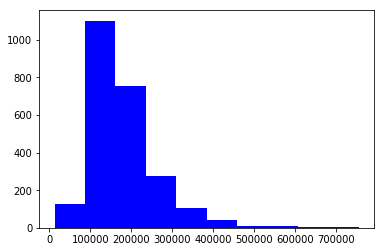

In [38]:
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

In [37]:
# Identifiying skewed features
skewed_columns = train_num.columns[abs(train_num.skew()) > 1.7]
skewed_columns

Index(['LotArea', 'MasVnrArea', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath',
       'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [38]:
# Transforming skewed features
train[skewed_columns[:-1]] = np.log1p(train[skewed_columns[:-1]])
pred[skewed_columns[:-1]] = np.log1p(pred[skewed_columns[:-1]])

In [39]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice           1.000000
OverallQual         0.799727
GrLivArea           0.701044
ExterQual           0.699948
KitchenQual         0.670468
SimplOverallQual    0.662882
GarageCars          0.643398
TotalBsmtSF         0.637747
GarageArea          0.630557
1stFlrSF            0.628361
BsmtQual            0.607143
OverallGrade        0.560615
YearBuilt           0.560388
FireplaceQu         0.547490
FullBath            0.536241
YearRemod/Add       0.528150
GarageYrBlt         0.513489
Fireplaces          0.491289
TotRmsAbvGrd        0.482935
HeatingQC           0.448586
BsmtFinSF1          0.440432
OpenPorchSF         0.428902
BsmtExposure        0.404795
LotArea             0.357824
BsmtFinType1        0.348122
WoodDeckSF          0.329719
GarageGrade         0.295939
GarageQual          0.282830
PavedDrive          0.280380
HalfBath            0.279179
                      ...   
2ndFlrSF            0.245635
SimplGarageQual     0.23

These are the predictor variables sorted in a descending order starting with the most correlated ones.

Let's briefly discuss multicollinearity: Multicollinearity happens when there is a strong correlation between independent variables. Linear regression or multilinear regression requires independent variables to have little or no similar features. Multicollinearity can lead to a variety of problems, including:
- The effect of predictor variables estimated by our regression will depend on what other variables are included in our model.
- Predictors can have different results depending on the observations in our sample, and small changes in samples can result in very different estimated effects.

(These are just a couple of examples.)

A heatmap is an excellent way to identify whether there is multicollinearity or not. The best way to solve multicollinearity is to use regularization methods like Ridge or Lasso. We will only use Ridge later on.

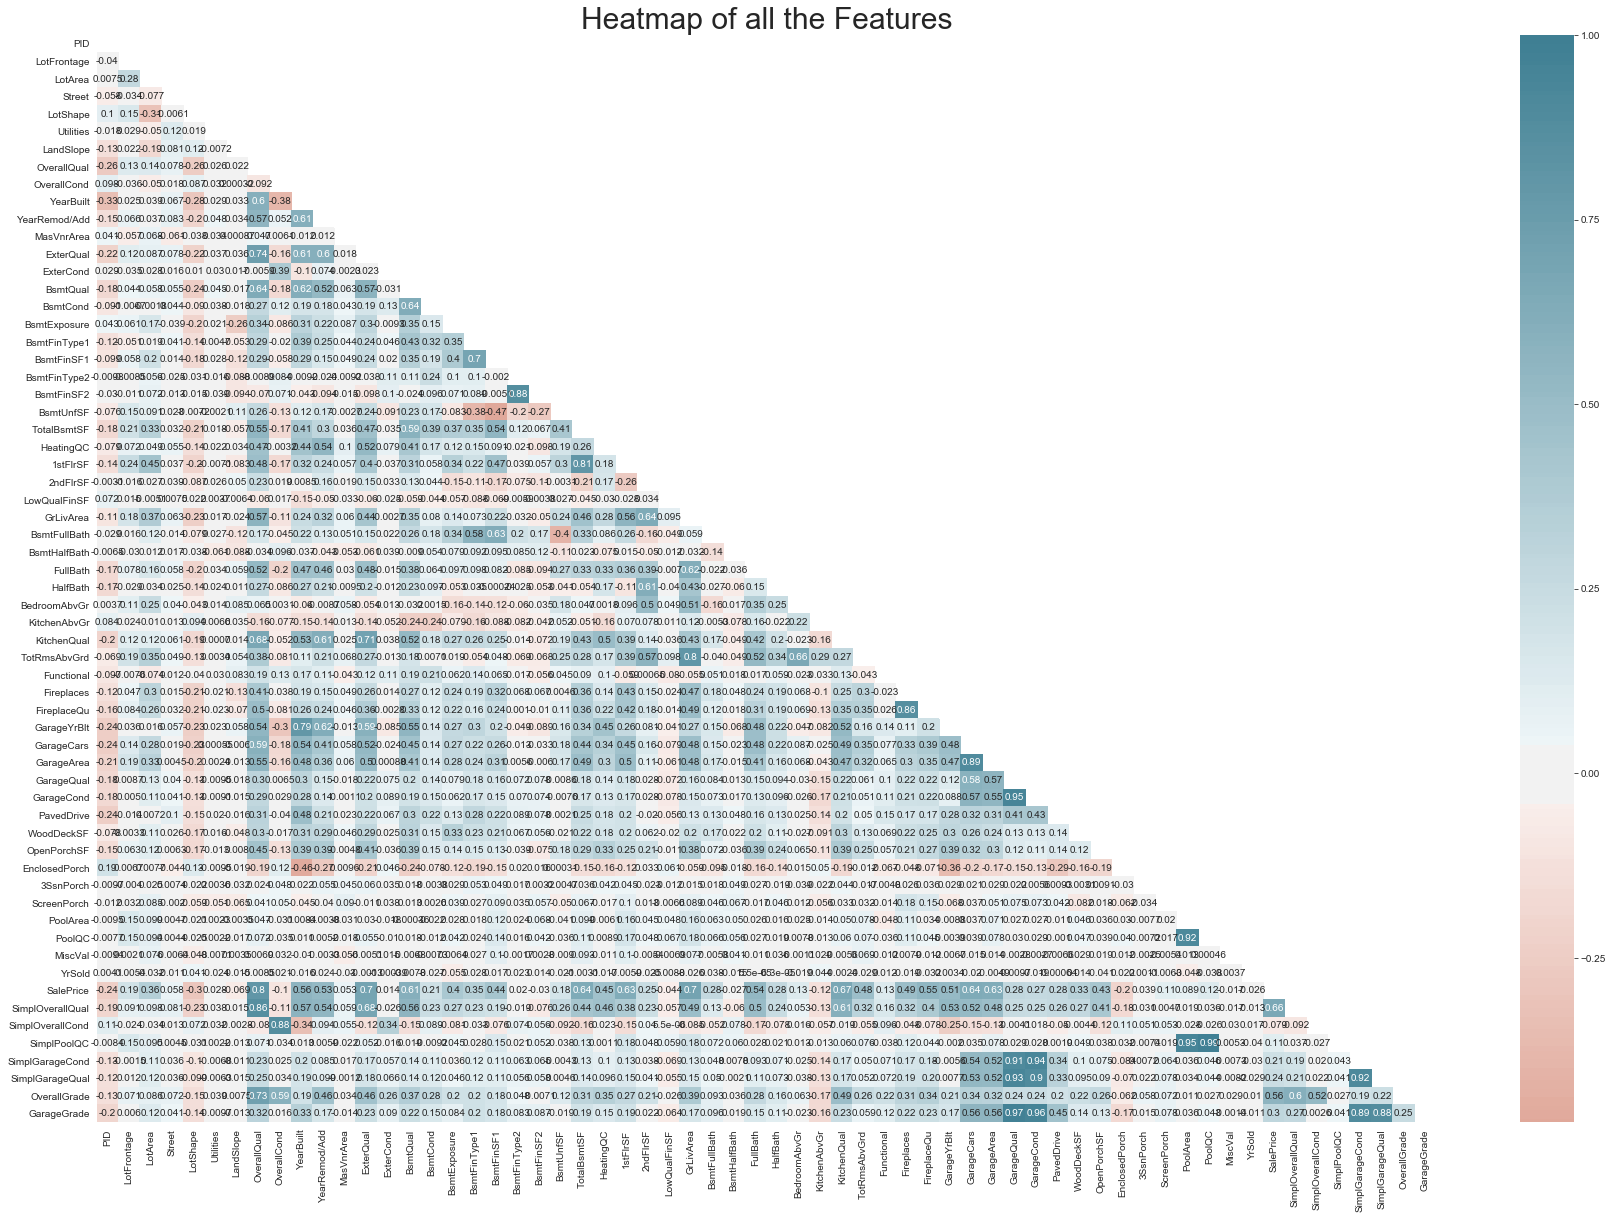

In [40]:
## Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(train.corr(), cmap=sns.diverging_palette(20, 220, n=200), mask = mask, annot=True, center = 0, ); 
plt.title("Heatmap of all the Features", fontsize = 30);

**Observation**

As we can see, the multicollinearity still exists in various features. However, we will keep them for now for the sake of learning and lets models(e.x. Regularization models such as Lasso, Ridge) do the clean up later on. Let's go through some of the correlations that still exists. 

If I were using only multiple linear regression, I would be deleting these features from the dataset to fit better multiple linear regression algorithms. However, we will be using many algorithms as scikit learn modules makes it easy to implement them and get the best possible model. Therefore, we will keep all the features for now. 

Let's take a closer look at the price again.

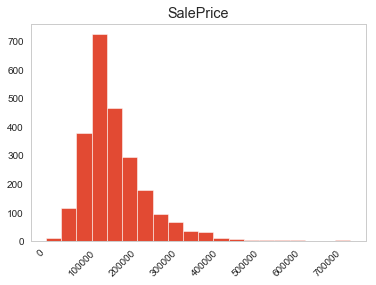

In [41]:
train.hist(column='SalePrice', bins=20, grid=False, xrot=45) 
plt.show()

Most of the houses in the data set have a price between 100 and 300 thousand dollars. However, there are a few expensive houses with prices well above that. In practice, this can lead to biased models that favor accurate predictions of expensive houses, i.e., a 10% error on a 500 thousand dollars house is equivalent to a 20% error on a 250 thousand dollars one.

To avoid building a model that is biased toward more expensive houses, we will apply the logarithm transformation and build a model that predicts the log of the sale price.

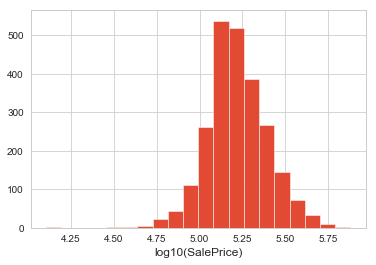

In [42]:
plt.hist(np.log10(train.SalePrice), bins=20)
plt.xlabel('log10(SalePrice)')
# plt.grid(None)
plt.show()

We have already applied a lot of data cleaning. Now we take care of the rest of the steps: encoding non- numerical entries with one-hot encoding, and replacing missing entries with the median value.
Let's create a preprocess(df) function to perform those steps.

In [43]:
#We use one-hot encoding to create dummy-variables for all the categorial non-ordinal variables
train = pd.get_dummies(train)
for c in train.columns:
    train[c] = train[c].fillna(train[c].median())

In [44]:
# We repeat this procedure but use drop_first to avoid multicollinearity
pred = pd.get_dummies(pred, drop_first=True)

In [45]:
pd.isnull(train).sum()

PID                      0
LotFrontage              0
LotArea                  0
Street                   0
LotShape                 0
Utilities                0
LandSlope                0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemod/Add            0
MasVnrArea               0
ExterQual                0
ExterCond                0
BsmtQual                 0
BsmtCond                 0
BsmtExposure             0
BsmtFinType1             0
BsmtFinSF1               0
BsmtFinType2             0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
HeatingQC                0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
                        ..
MiscFeature_Shed         0
MiscFeature_TenC         0
MoSold_Apr               0
MoSold_Aug               0
MoSold_Dec               0
MoSold_Feb               0
M

In [46]:
train.set_index('SalePrice', inplace=True)

In [47]:
train.head() , pred.head()

(                 PID  LotFrontage   LotArea  Street  LotShape  Utilities  \
 SalePrice                                                                  
 236000     528275070          0.0  9.082052       2         3          4   
 155000     535305120         75.0  9.227296       2         4          4   
 75000      923228250         21.0  7.601902       2         4          4   
 165500     535152150         70.0  9.264165       2         3          4   
 122000     903475060         60.0  9.222368       2         3          4   
 
            LandSlope  OverallQual  OverallCond  YearBuilt  YearRemod/Add  \
 SalePrice                                                                  
 236000             3            7            5       2000           2000   
 155000             3            6            6       1951           1951   
 75000              3            4            5       1970           1970   
 165500             3            5            5       1959           1959 

In [48]:
# We drop all dummy variables that are not present in our training dataset
pred.drop(columns=['PoolQC_3', 'RoofMatl_Roll', 'Exterior2nd_Other', 'ExterCond_4', 'ExterCond_3'], inplace=True)

In [49]:
# We reduce our training dataset to the variables that are available in our prediction data
train =  train[pred.columns]

In [50]:
train.reset_index(inplace=True)

In [51]:
train.shape , pred.shape

((2426, 213), (497, 212))

Outliers is also something that we should be aware of, because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.
Outliers is a complex subject and it deserves more attention. Here, we'll just do a quick analysis through the standard deviation of 'SalePrice' and a set of scatter plots.

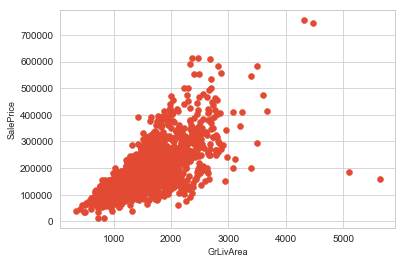

In [52]:
# outlier 
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=9)
plt.xlabel('GrLivArea', fontsize=9)
plt.show()

There seems to be 2 extreme outliers on the bottom right, really large houses that sold for really cheap. More generally, the author of the dataset recommends removing 'any houses with more than 4000 square feet' from the dataset.

### Model fitting

The analysis should include an appropriate baseline and evaluate three different models ranging in complexity

- A simple model with two variables (three with the target variable)
- An intermediate model (between 10 and 20 variables)
- A complex model with all variables

In [53]:
# # We split our training dataset
# train_df, test_df = train_test_split(
# train, test_size=0.3, random_state=0)

# print('Train DataFrame:', train_df.shape)
# print('Test DataFrame:', test_df.shape)

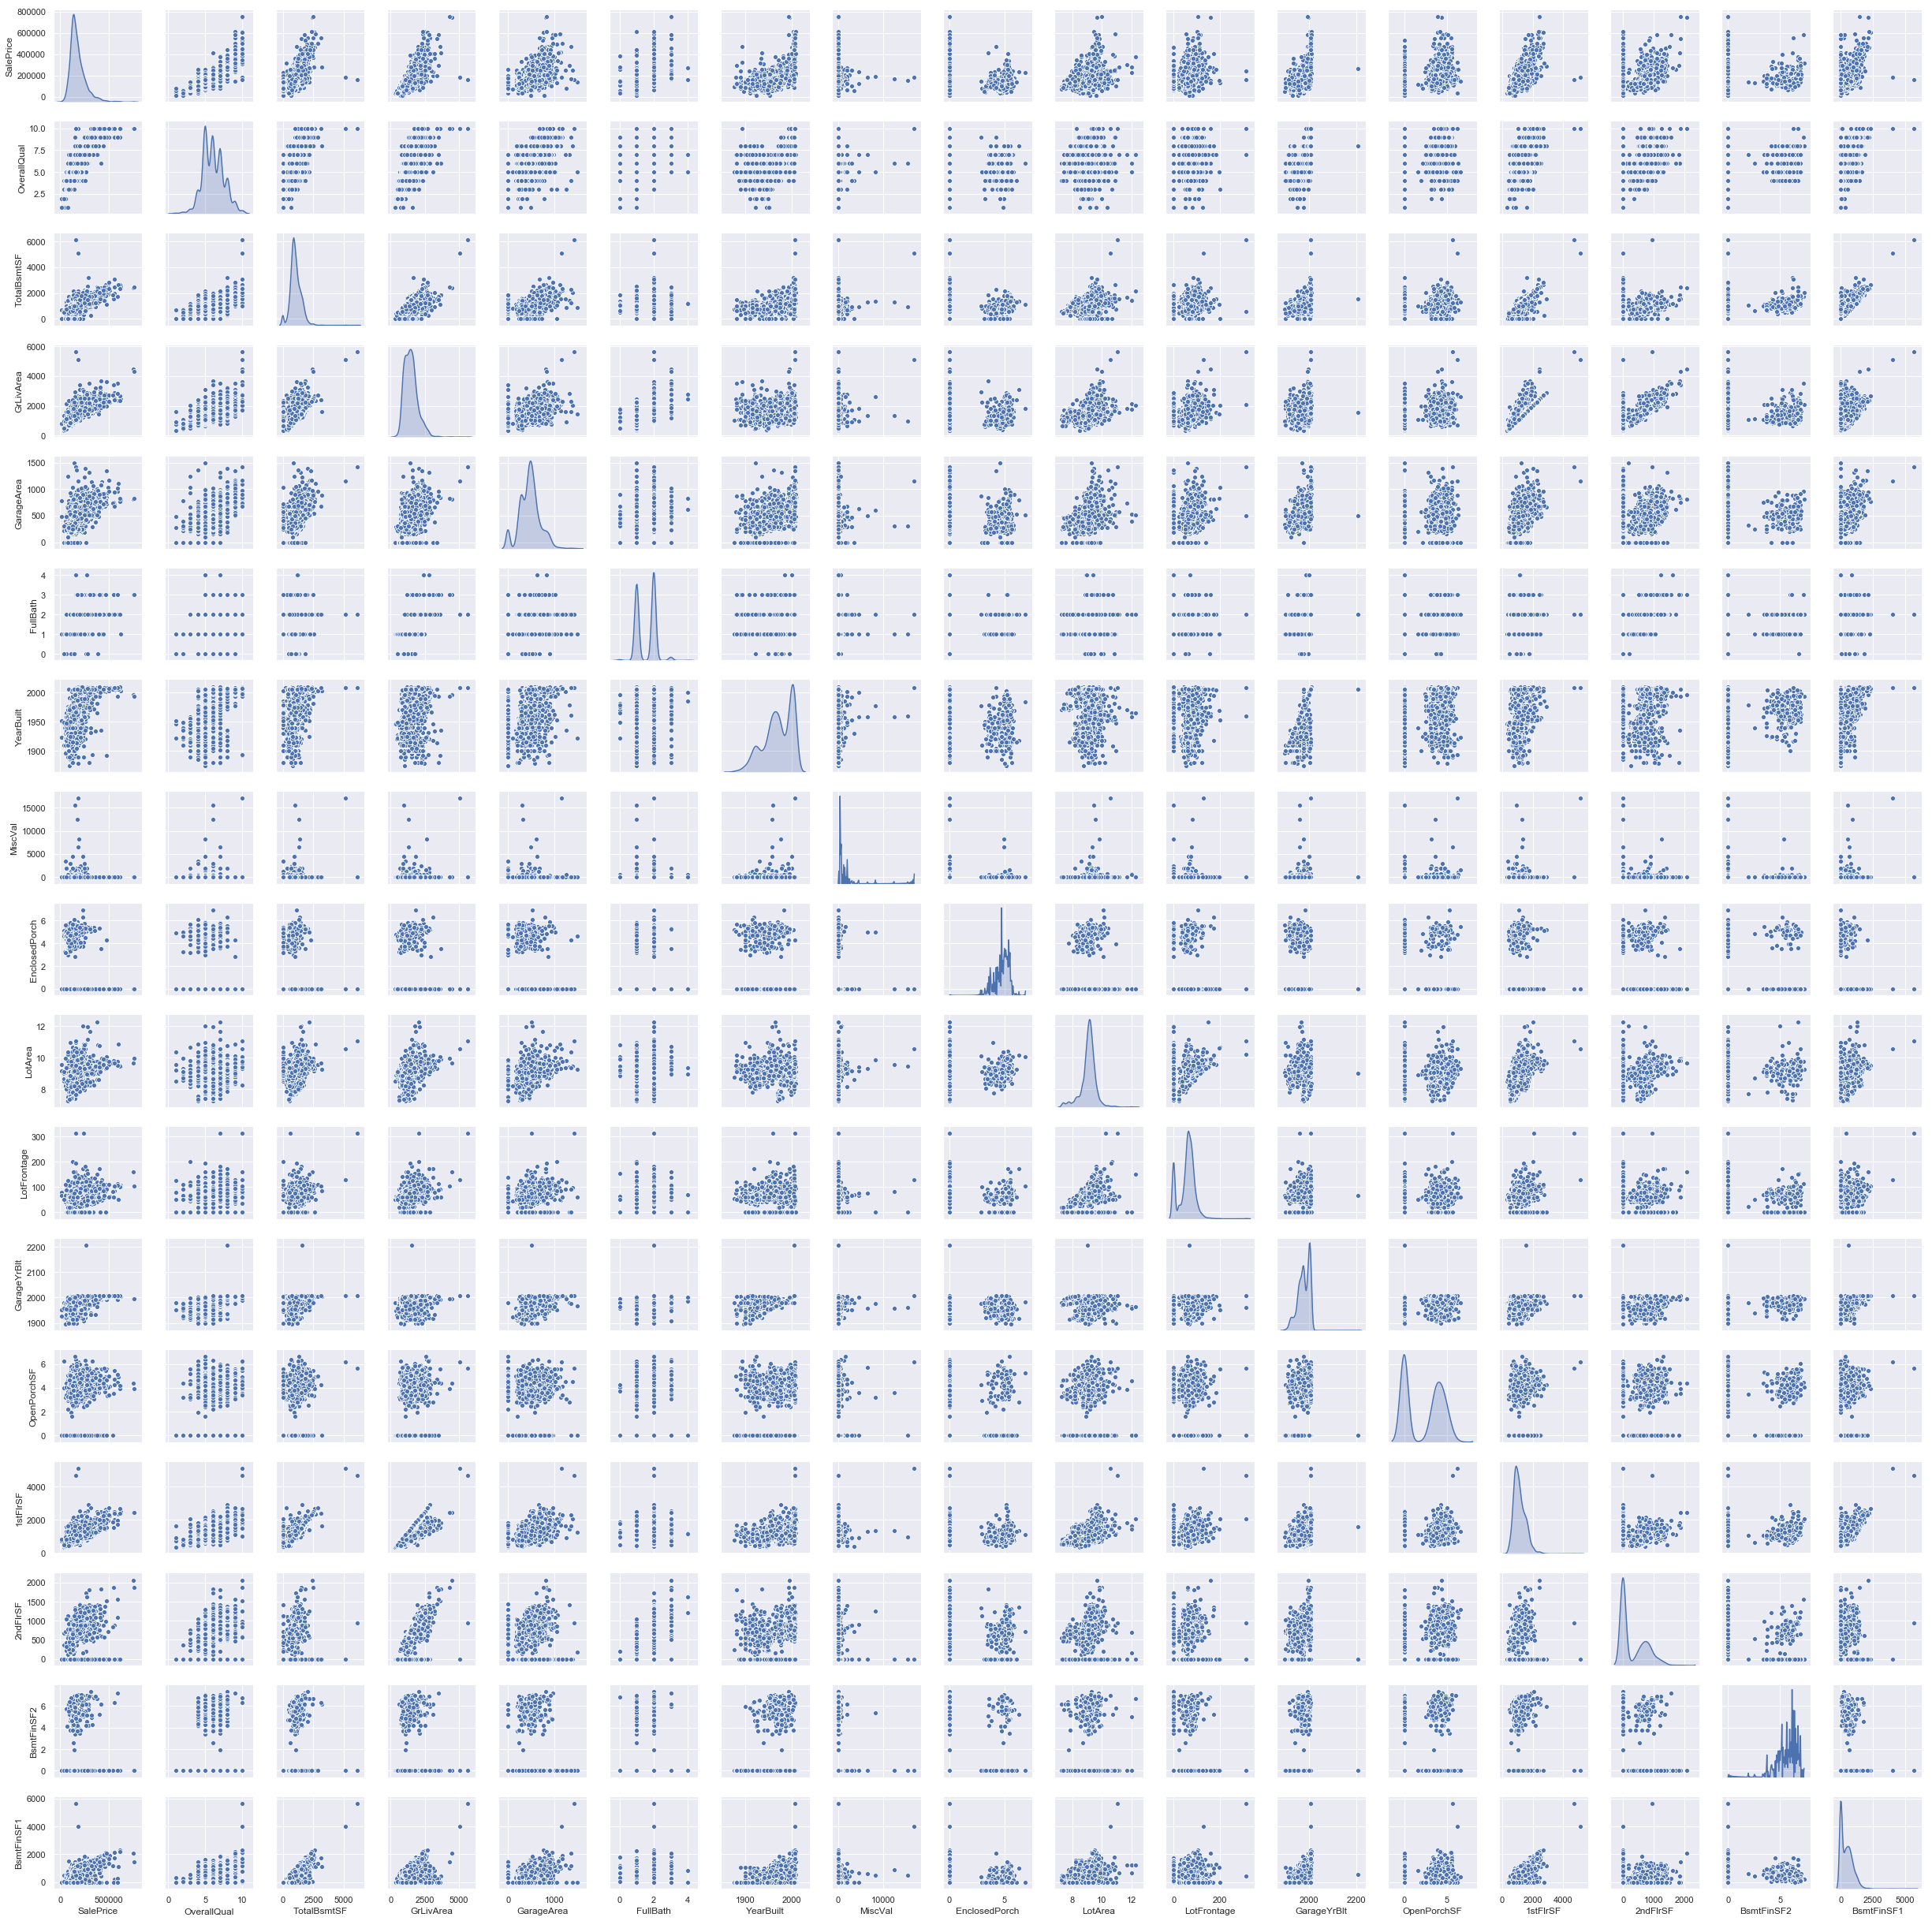

In [54]:
sns.set()
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt', 'MiscVal', 'EnclosedPorch', 'LotArea', 'LotFrontage', 'GarageYrBlt', 'OpenPorchSF', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF2', 'BsmtFinSF1']
sns.pairplot(train[columns], size = 2, kind ='scatter', diag_kind='kde')
plt.show()

**Observation**

Although we already know some of the main figures, this pair plot gives us a reasonable overview insight about the correlated features. Here are some of my analysis.
- One interesting observation is between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area.
- One more interesting observation is between 'SalePrice' and 'YearBuilt'. In the bottom of the 'dots cloud', we see what almost appears to be a exponential function.We can also see this same tendency in the upper limit of the 'dots cloud'
- Last observation is that prices are increasing faster now with respect to previous years.

In [55]:
# Manually removing outliers from the training data
train = train[train['SalePrice'] < 700000]
train = train[train['MiscVal'] < 100000]
train = train[train['EnclosedPorch'] < 400]
train = train[train['OpenPorchSF'] < 600]
train = train[train['WoodDeckSF'] < 1000]
train = train[train['GrLivArea'] < 4000]
train = train[train['1stFlrSF'] < 3000]
train = train[train['2ndFlrSF'] < 1500]
train = train[train['TotalBsmtSF'] < 4000]
train = train[train['BsmtFinSF2'] < 1200]
train = train[train['BsmtFinSF1'] < 3000]
train = train[train['MasVnrArea'] < 1000]
train = train[train['LotArea'] < 40000]
train = train[train['LotFrontage'] < 200]
train = train[train['GarageYrBlt'] < 2020]

Before applying the model, we still need to create the X/y variables and split the data into training/testing sets.

In [56]:
train.set_index('PID', inplace=True)
# pred.set_index('PID', inplace=True)
# train_df.set_index('PID', inplace=True)
# test_df.set_index('PID', inplace=True)

In [57]:
# train['SalePrice'] = np.log10(train['SalePrice'])
# train_df['SalePrice'] = np.log10(train_df['SalePrice'])
# test_df['SalePrice'] = np.log10(test_df['SalePrice'])

In [58]:
# X_tr = scale(train_df.drop(columns=['SalePrice']))
# y_tr = train_df['SalePrice'].values

# X_te = scale(test_df.drop(columns=['SalePrice']))
# y_te = test_df['SalePrice'].values

In [59]:
X = train.drop('SalePrice', axis=1).values
y = np.log10(train.SalePrice).values

# Split into train/test sets
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.042, random_state=0)

In [60]:
print('Train:', X_tr.shape, y_tr.shape) 
print('Test:', X_te.shape, y_te.shape) 

Train: (2309, 211) (2309,)
Test: (102, 211) (102,)


The features have a different scale, so we also need to standardize them before applying
ridge regression in the next part.

In [61]:
scaler = StandardScaler()
X_tr_rescaled = scaler.fit_transform(X_tr)
X_te_rescaled = scaler.transform(X_te)

Before using ridge regression, let's do a quick test and fit a linear regression model.
We now use a recursive feature elimination example with automatic tuning of the number of features selected with cross-validation. Recursive Feature Elimination (RFE) as its title suggests recursively removes features, builds a model using the remaining attributes and calculates model accuracy. RFE is able to work out the combination of attributes that contribute to the prediction on the target variable (or class).

In [62]:
lr = LinearRegression()

In [63]:
# Recursive feature elimination with the best 2 features
rfe_simple = RFE(lr, 2)
lr_simple = rfe_simple.fit(X_tr_rescaled, y_tr)

y_tr_simple_pred = lr_simple.predict(X_tr_rescaled)
y_te_simple_pred = lr_simple.predict(X_te_rescaled)

mae_simple = MAE(10**y_te, 10**y_te_simple_pred)

print('Train data MSE: {:.3f}'.format((MSE(y_tr,y_tr_simple_pred))))
print('Test data MSE: {:.3f}'.format((MSE(y_te,y_te_simple_pred))))

print('Train data score :{}'.format(lr_simple.score(X_tr_rescaled, y_tr)))
print('Test data score:{}'.format(lr_simple.score(X_te_rescaled, y_te)))

print('Train data MAE: {:.3f}'.format(MAE(10**y_tr, 10**y_tr_simple_pred)))
print('Test data MAE: {:.3f}'.format(MAE(10**y_te, 10**y_te_simple_pred)))
train.drop(columns=['SalePrice']).iloc[:, lr_simple.support_].head()

Train data MSE: 0.007
Test data MSE: 0.007
Train data score :0.7657809087727776
Test data score:0.7458987966975753
Train data MAE: 24878.758
Test data MAE: 22246.035


,OverallQual,GrLivArea
PID,,
528275070,7,2256
535305120,6,1575
923228250,4,1092
535152150,5,1700
903475060,7,1889


In [64]:
# Recursive feature elimination with the best 15 features (intermediate, between 10 and 20)
rfe_interm = RFE(lr, 5)
lr_interm = rfe_interm.fit(X_tr_rescaled, y_tr)

y_tr_interm_pred = lr_interm.predict(X_tr_rescaled)
y_te_interm_pred = lr_interm.predict(X_te_rescaled)

mae_interm = MAE(10**y_te, 10**y_te_interm_pred)

print('Train data MSE: {:.3f}'.format((MSE(y_tr, y_tr_interm_pred))))
print('Test data MSE: {:.3f}'.format((MSE(y_te, y_te_interm_pred))))

print('Train data score :{}'.format(lr_interm.score(X_tr_rescaled, y_tr)))
print('Test data score:{}'.format(lr_interm.score(X_te_rescaled, y_te)))

print('Train data MAE: {:.3f}'.format(MAE(10**y_tr, 10**y_tr_interm_pred)))
print('Test data MAE: {:.3f}'.format(MAE(10**y_te, 10**y_te_interm_pred)))
train.drop(columns=['SalePrice']).iloc[:, lr_interm.support_].head()

Train data MSE: 0.004
Test data MSE: 0.003
Train data score :0.8609740725029932
Test data score:0.8796780624300178
Train data MAE: 18676.325
Test data MAE: 15743.103


,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,GrLivArea
PID,,,,,
528275070,7,5,2000,952.0,2256
535305120,6,6,1951,216.0,1575
923228250,4,5,1970,546.0,1092
535152150,5,5,1959,1398.0,1700
903475060,7,4,1910,925.0,1889


In [65]:
# Linear regression with all features
lr.fit(X_tr_rescaled, y_tr)

y_tr_lr_pred = lr.predict(X_tr_rescaled)
y_te_lr_pred = lr.predict(X_te_rescaled)

print('Train data MSE: {:.3f}'.format((MSE(y_tr, y_tr_lr_pred))))
print('Test data MSE: {:.3f}'.format((MSE(y_te, y_te_lr_pred))))

print('Train data score :{}'.format(lr.score(X_tr_rescaled, y_tr)))
print('Test data score:{}'.format(lr.score(X_te_rescaled, y_te)))

Train data MSE: 0.002
Test data MSE: 0.002
Train data score :0.9350908721623656
Test data score:0.9268922770828076


In [66]:
# Recursive feature elimination validation curve
# Variable to store the results
gs_results = []

for feature in range(1, 25): 
    # Create and fit linear regression 
    rfe = RFE(lr, feature) 
    rfe.fit(X_tr_rescaled, y_tr)
    # Save model and its performance on train/test sets
    gs_results.append({ 'feature': feature,
                        'train_mse': MSE(y_tr, rfe.predict(X_tr_rescaled)), 
                        'test_mse': MSE(y_te, rfe.predict(X_te_rescaled)), 
                        'train_mae': MAE(10**y_tr, 10**rfe.predict(X_tr_rescaled)), 
                        'test_mae': MAE(10**y_te, 10**rfe.predict(X_te_rescaled)),
})
# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results) 
gs_results.head()

,feature,test_mae,test_mse,train_mae,train_mse
0,1,25136.200666,0.008195,30007.717534,0.009694
1,2,22246.035327,0.006819,24878.757775,0.007230
2,3,20877.880393,0.006043,21698.894014,0.005933
3,4,18161.177659,0.004267,19844.170500,0.005081
4,5,15743.102569,0.003229,18676.324581,0.004291


A good way to visualize the results it by plotting the validation curves. 

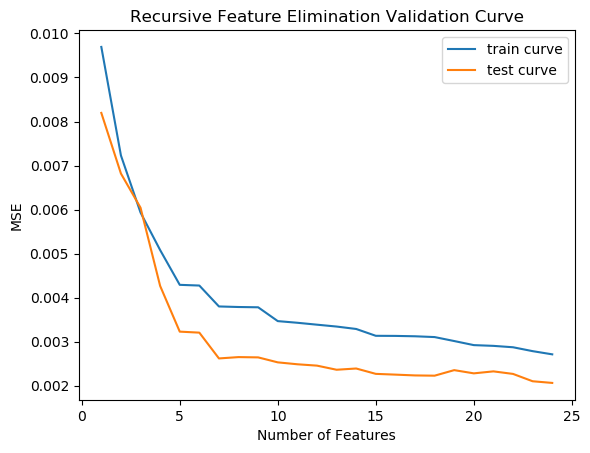

In [67]:
# Plot the validation curves
plt.style.use('default')
plt.plot(gs_results['feature'], gs_results['train_mse'], label='train curve') 
plt.plot(gs_results['feature'], gs_results['test_mse'], label='test curve') 
plt.xlabel('Number of Features')
plt.ylabel('MSE')
plt.title('Recursive Feature Elimination Validation Curve')
plt.legend()
plt.show()

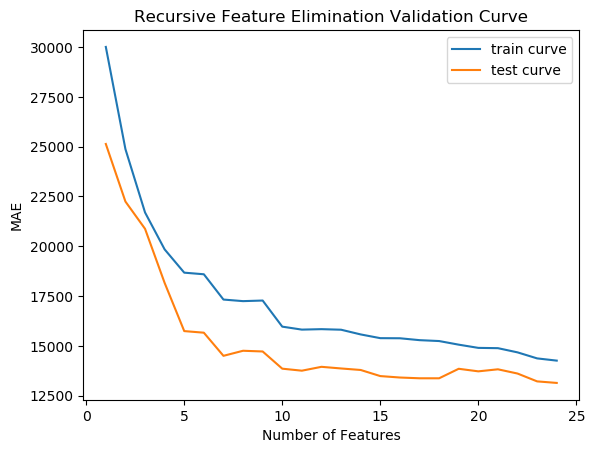

In [68]:
# Plot the validation curves
plt.style.use('default')
plt.plot(gs_results['feature'], gs_results['train_mae'], label='train curve') 
plt.plot(gs_results['feature'], gs_results['test_mae'], label='test curve') 
plt.xlabel('Number of Features')
plt.ylabel('MAE')
plt.title('Recursive Feature Elimination Validation Curve')
plt.legend()
plt.show()

### Regularization 

What makes regression model more effective is its ability of *regularizing*. The term "regularizing" stands for models ability **to structurally prevent overfitting by imposing a penalty on the coefficients.** 

These regularization methods work by penalizing **the magnitude of the coefficients of features** and at the same time **minimizing the error between the predicted value and actual observed values**.  This minimization becomes a balance between the error (the difference between the predicted value and observed value) and the size of the coefficients. The only difference between Ridge and Lasso is **the way they penalize the coefficients.**  

**Ridge regression**

Let's first create the list of alpha values and evaluate a ridge regression model for each one. 

In [69]:
# Variable to store the results
gs_results = []
alphas = [0.1, 1, 1e1, 1e2, 1e3, 1e4, 2e4, 5e4, 8e4, 1e5, 1e6, 1e7, 1e8]

# Grid search
# for alpha in np.logspace(1, 4, num=20):

for alpha in alphas:

    # Create and fit ridge regression 
    ridge = Ridge(alpha=alpha) 
    ridge.fit(X_tr_rescaled, y_tr)
    y_tr_pred_ridge = ridge.predict(X_tr_rescaled)
    y_te_pred_ridge = ridge.predict(X_te_rescaled)
    # Save model and its performance on train/test sets
    gs_results.append({ 'alpha': alpha,
                        'train_mse': MSE(y_tr, ridge.predict(X_tr_rescaled)), 
                        'train_mae': MAE(10**y_tr, 10**ridge.predict(X_tr_rescaled)), 
                        'test_mse': MSE(y_te, ridge.predict(X_te_rescaled)), 
                        'test_mae': MAE(10**y_te, 10**ridge.predict(X_te_rescaled)),
})
# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results) 
gs_results.head()

,alpha,test_mae,test_mse,train_mae,train_mse
0,0.1,11910.266610,0.001931,11760.321873,0.001994
1,1.0,11899.191606,0.001933,11755.984963,0.001995
2,10.0,11845.305327,0.001949,11769.088763,0.002005
3,100.0,11956.964029,0.002022,11964.770098,0.002091
4,1000.0,11768.650088,0.002155,13105.094472,0.002465


Note that we raise the predictions to power 10 for the MAE metric since we want to get a score in dollars and not log-dollars - since our model predicts the logarithm of the sale prices base 10.

In the code from above, we found the best alpha value for a single train/test set split. This result shouldn't be too far from the true optimal alpha value since the train/test scores are evaluated on a large set of data points. However, it's often a good idea to average the scores on different train/test splits to get more stable results. This is called cross-validation.

In [70]:
# Fit/test N models
gs_results = []
# alphas = [0.1, 1, 10, 100, 1e3, 1e4, 2e4, 5e4, 8e4, 1e5, 1e6, 1e7, 1e8]

for run_idx in range(10):
    # Split into train/test sets
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=0)
      
    # Standardize features
    X_tr_rescaled = scaler.fit_transform(X_tr) 
    X_te_rescaled = scaler.transform(X_te)
    
    # Grid search
    for alpha in np.logspace(-1, 4, num=20):

        # Create and fit ridge regression 
        ridge = Ridge(alpha=alpha) 
        ridge.fit(X_tr_rescaled, y_tr)
        # Save model and its performance on train/test sets
        gs_results.append({ 
            'model': ridge, 
            'alpha': alpha,
            'run_idx': run_idx,
            'train_mse': MSE(y_tr, ridge.predict(X_tr_rescaled)), 
            'train_mae': MAE(10**y_tr, 10**ridge.predict(X_tr_rescaled)), 
            'test_mse': MSE(y_te, ridge.predict(X_te_rescaled)), 
            'test_mae': MAE(10**y_te, 10**ridge.predict(X_te_rescaled)),
})
# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results) 
gs_results.head()

,alpha,model,run_idx,test_mae,test_mse,train_mae,train_mse
0,0.100000,"Ridge(alpha=0.1, copy_X=True, fit_intercept=Tr...",0,13121.986092,0.002683,11413.836367,0.001932
1,0.183298,"Ridge(alpha=0.18329807108324356, copy_X=True, ...",0,13120.424179,0.002683,11412.673266,0.001932
2,0.335982,"Ridge(alpha=0.33598182862837817, copy_X=True, ...",0,13118.057354,0.002681,11411.117053,0.001932
3,0.615848,"Ridge(alpha=0.6158482110660264, copy_X=True, f...",0,13114.693678,0.002679,11409.568939,0.001932
4,1.128838,"Ridge(alpha=1.1288378916846888, copy_X=True, f...",0,13110.792541,0.002675,11407.633682,0.001933


In [71]:
# Group results by alpha value
gb_alpha = gs_results.groupby('alpha')
  
# Compute train/test mean scores with std
mean_tr = gb_alpha.train_mse.mean() 
mean_te = gb_alpha.test_mse.mean() 
std_tr = gb_alpha.train_mse.std() 
std_te = gb_alpha.test_mse.std() 
alphas = mean_tr.index.values
  
# Get entry with the best mean test MSE
best_alpha = mean_te.idxmin()
best_result = gb_alpha.get_group(best_alpha)

# Print the details
print('Best alpha: {:.1e}'.format(best_alpha)) 
print('Test MSE: {:.4f}'.format(best_result.test_mse.mean())) 
print('Test MAE: {:.0f}'.format(best_result.test_mae.mean()))

Best alpha: 1.3e+01
Test MSE: 0.0026
Test MAE: 13151


A good way to visualize the results it by plotting the validation curves. For each alpha, we plot the train and test scores to see which value minimizes the error.

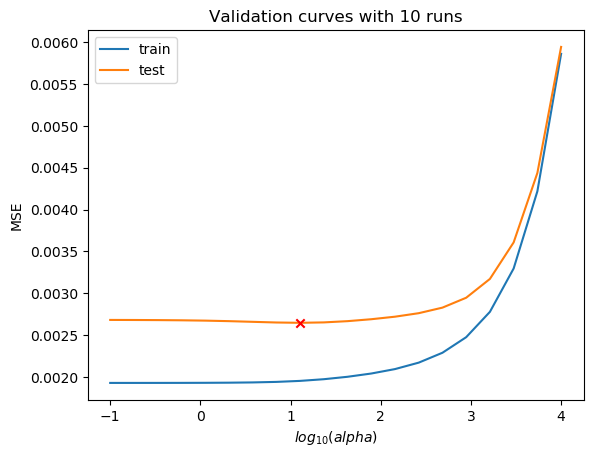

In [72]:
# Plot mean scores
plt.plot(np.log10(alphas), mean_tr, label='train') 
plt.plot(np.log10(alphas), mean_te, label='test')
# Quantify variance with ±std curves
plt.fill_between(np.log10(alphas), mean_tr-std_tr, mean_tr+std_tr, alpha=0.2) 
plt.fill_between(np.log10(alphas), mean_te-std_te, mean_te+std_te, alpha=0.2)
# Add marker for best score
plt.scatter(np.log10(best_alpha), mean_te.min(), marker='x', c='red', zorder=10)

plt.title('Validation curves with {} runs'.format(len(gs_results.groupby('run_idx')))) 
plt.xlabel('$log_{10}(alpha)$')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [73]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60, 100, 200])
ridge.fit(X_tr_rescaled,y_tr)
alpha = ridge.alpha_
print('best alpha',alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],cv = 5)
ridge.fit(X_tr_rescaled,y_tr)

alpha = ridge.alpha_
print("Best alpha :", alpha)
print(MAE(10**y_tr, 10**ridge.predict(X_tr_rescaled)))
print(MAE(10**y_te, 10**ridge.predict(X_te_rescaled)))
y_tr_rdg = ridge.predict(X_tr_rescaled)
y_te_rdg = ridge.predict(X_te_rescaled)

best alpha 100.0
Try again for more precision with alphas centered around 100.0
Best alpha : 140.0
11737.134074172021
13197.856282348253


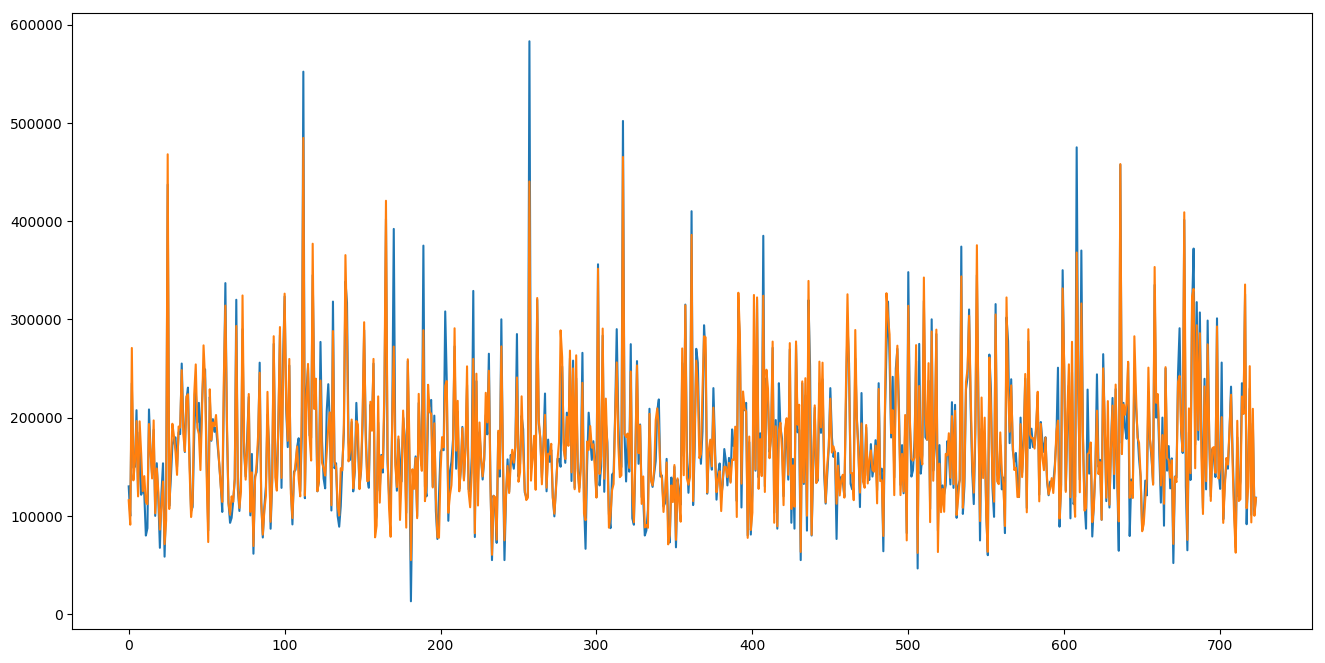

In [106]:
plt.figure(figsize=(16,8))
plt.plot(y_te,label ='Test')
plt.plot(y_te_rdg, label = 'Predict')
plt.show()

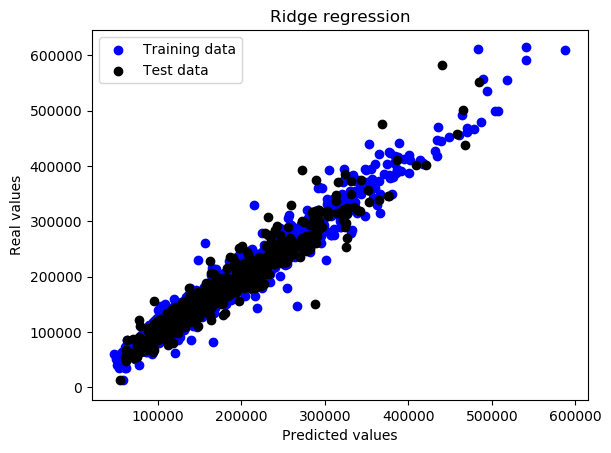

In [107]:
# Plot predictions - values
plt.scatter(10**y_tr_rdg, 10**y_tr, c = "blue",  label = "Training data")
plt.scatter(10**y_te_rdg, 10**y_te, c = "black",  label = "Test data")
plt.title("Ridge regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.show()

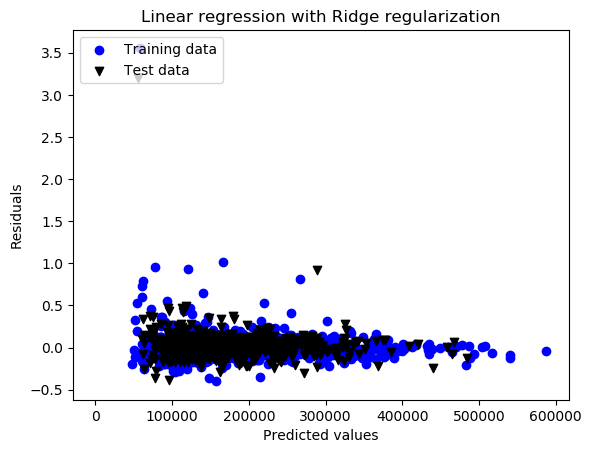

In [109]:
# Plot residuals
plt.scatter(10**y_tr_rdg, (10**y_tr_rdg - 10**y_tr)/10**y_tr, c = "blue",  label = "Training data")
plt.scatter(10**y_te_rdg, (10**y_te_rdg - 10**y_te)/10**y_te, c = "black", marker = "v", label = "Test data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
# plt.hlines(y = 0, xmin = 4.5, xmax = 6, color = "red")
plt.show()

### Model Comparison

In [78]:
mae_base = np.mean(np.abs(10**y_te - 10**np.mean(y_tr)))
mae_ridge = MAE(10**y_te, 10**y_te_rdg)

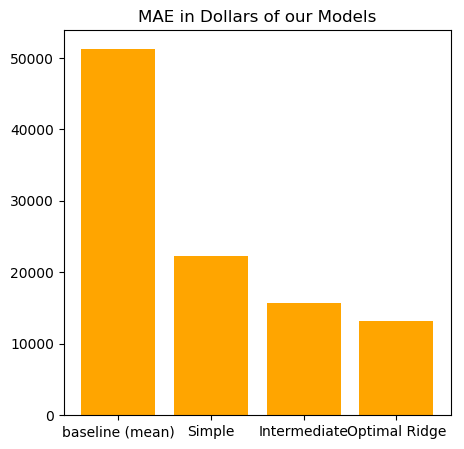

In [79]:
fig = plt.figure(figsize=(5,5))
plt.bar([1, 2, 3, 4],[mae_base, mae_simple, mae_interm, mae_ridge], color="orange")
plt.xticks([1, 2, 3, 4], ['baseline (mean)', 'Simple','Intermediate','Optimal Ridge'])
plt.title('MAE in Dollars of our Models')
plt.show()

## Making Predictions

In [80]:
pred.set_index('PID', inplace=True)

In [81]:
pred.shape

(497, 211)

In [82]:
X_te_rescaled.shape

(724, 211)

In [83]:
pred_scaled = scaler.transform(pred)

In [84]:
predictions_simple = lr_simple.predict(pred_scaled)

In [85]:
pred['predictions_simple'] = predictions_simple

In [86]:
pred['SalePrice'] = 10**pred['predictions_simple']

In [87]:
pred['SalePrice'].head()

PID
909279080    187896.996735
907126050    117055.560729
528144030    268399.329198
535452060    122075.440511
911202100    103143.049478
Name: SalePrice, dtype: float64

In [88]:
pred.reset_index(inplace=True)

In [89]:
predictions_df = pred[['PID','SalePrice']]
predictions_df.head()

,PID,SalePrice
0,909279080,187896.996735
1,907126050,117055.560729
2,528144030,268399.329198
3,535452060,122075.440511
4,911202100,103143.049478


In [90]:
predictions_df['SalePrice'].describe()

count       497.000000
mean     180646.963968
std       78439.050877
min       59582.978046
25%      126275.359312
50%      158799.158342
75%      214671.655311
max      849164.844207
Name: SalePrice, dtype: float64

In [91]:
predictions_df.to_csv('predictions-simple-model.csv', index=False, float_format='%.0f')

In [92]:
predictions_interm = lr_interm.predict(pred_scaled)

In [93]:
pred['predictions_interm'] = predictions_interm

In [94]:
pred['SalePrice'] = 10**pred['predictions_interm']

In [95]:
pred['SalePrice'].head()

0    171222.577051
1    151268.997020
2    256123.405083
3    138423.366455
4     96850.310973
Name: SalePrice, dtype: float64

In [96]:
pred.reset_index(inplace=True)

In [97]:
predictions_df = pred[['PID','SalePrice']]
predictions_df.head()

,PID,SalePrice
0,909279080,171222.577051
1,907126050,151268.997020
2,528144030,256123.405083
3,535452060,138423.366455
4,911202100,96850.310973


In [98]:
predictions_df['SalePrice'].describe()

count    4.970000e+02
mean     1.823003e+05
std      8.749375e+04
min      5.268227e+04
25%      1.261180e+05
50%      1.623660e+05
75%      2.127202e+05
max      1.144233e+06
Name: SalePrice, dtype: float64

In [99]:
predictions_df.to_csv('predictions-intermediate-model.csv', index=False, float_format='%.0f')

In [100]:
predictions_ridge = ridge.predict(pred_scaled)

In [101]:
pred['predictions_ridge'] = predictions_ridge

In [102]:
pred['SalePrice'] = 10**pred['predictions_ridge']

In [104]:
pred['SalePrice'].head()

0    186112.276388
1    148315.539884
2    277435.139926
3    122037.612745
4     93777.292407
Name: SalePrice, dtype: float64

In [103]:
pred.reset_index(inplace=True)

In [104]:
predictions_df = pred[['PID','SalePrice']]
predictions_df.head()

,PID,SalePrice
0,909279080,186112.276388
1,907126050,148315.539884
2,528144030,277435.139926
3,535452060,122037.612745
4,911202100,93777.292407


In [105]:
predictions_df['SalePrice'].describe()

count       497.000000
mean     183364.802536
std       84852.039900
min       53317.302818
25%      130169.973541
50%      159019.993409
75%      214358.385685
max      927460.317398
Name: SalePrice, dtype: float64

In [106]:
predictions_df.to_csv('predictions-complex-model.csv', index=False, float_format='%.0f')

In [117]:
def outlier_aware_hist(data, lower=None, upper=None):
    if not lower or lower < data.min():
        lower = data.min()
        lower_outliers = False
    else:
        lower_outliers = True

    if not upper or upper > data.max():
        upper = data.max()
        upper_outliers = False
    else:
        upper_outliers = True

    n, bins, patches = plt.hist(data, range=(lower, upper), bins='auto')

    if lower_outliers:
        n_lower_outliers = (data < lower).sum()
        patches[0].set_height(patches[0].get_height() + n_lower_outliers)
        patches[0].set_facecolor('c')
        patches[0].set_label('Lower outliers: ({:.2f}, {:.2f})'.format(data.min(), lower))

    if upper_outliers:
        n_upper_outliers = (data > upper).sum()
        patches[-1].set_height(patches[-1].get_height() + n_upper_outliers)
        patches[-1].set_facecolor('m')
        patches[-1].set_label('Upper outliers: ({:.2f}, {:.2f})'.format(upper, data.max()))

    if lower_outliers or upper_outliers:
        plt.legend()

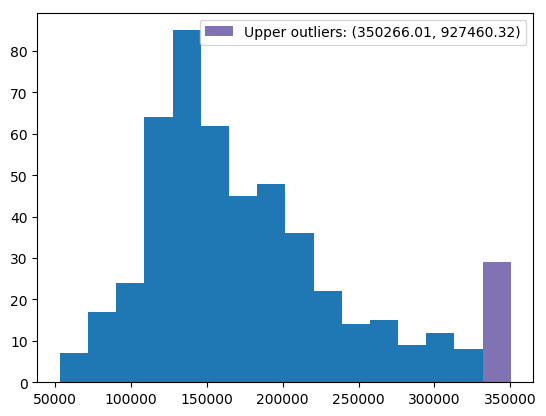

In [118]:
def mad(data):
    median = np.median(data)
    diff = np.abs(data - median)
    mad = np.median(diff)
    return mad

def calculate_bounds(data, z_thresh=3.5):
    MAD = mad(data)
    median = np.median(data)
    const = z_thresh * MAD / 0.6745
    return (median - const, median + const)

outlier_aware_hist(10**predictions_ridge, *calculate_bounds(10**predictions_ridge))

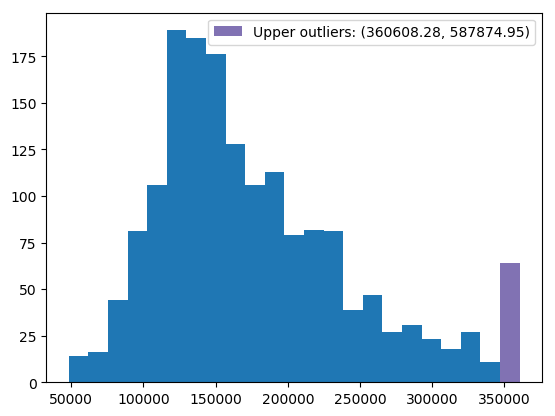

In [123]:
outlier_aware_hist(10**y_tr_rdg, *calculate_bounds(10**y_tr_rdg))